<a href="https://colab.research.google.com/github/Kggzzz/Multivaririate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA 

In [2]:
import matplotlib 

In [3]:
Name = 'รัฐพร ลีนาราชรุ่งเรือง'
ID = '6130210204'

In [4]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [5]:
Data = DataGenerator(Name,ID)

021:22:19


In [6]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,6.998573,9.408469,2.532186,-8.431070,-8.143690,-4.183724,-6.978903,0.551976,-5.264983,-8.393296,-4.300683,-1.958555,2.920012,-3.306722,1.790339,-4.060140,-7.391625,-9.224140,-4.908863,-5.676293,-8.491590,6.623749,18.816939,35.118746
1,4.793187,-10.486679,-11.349761,-1.199810,7.699211,-0.448901,8.037399,-4.052600,-4.742263,7.565513,-0.992729,0.916247,6.230184,-3.126671,-8.486790,3.047311,-2.881562,-1.499004,-5.051019,3.580666,-0.262859,7.287736,-20.973358,38.438682
2,6.868155,8.609617,1.871433,-7.423131,-5.201634,-2.139696,-8.653000,-0.492976,-4.859249,-6.213616,-7.360273,-3.566184,3.883799,-5.042229,0.804977,-4.970622,-7.574512,-9.900526,-4.340172,-5.954579,-7.940610,6.969959,17.219235,36.849794
3,-0.799462,1.689073,-4.370141,0.726486,8.118532,8.753459,4.033157,9.700902,-8.339233,-1.875282,-6.949858,-8.679964,1.534346,3.048216,-4.838816,0.842730,7.680817,6.593378,-0.033904,3.243168,-3.415298,3.079304,3.378146,17.396518
4,-3.387209,5.545563,-1.587408,4.467429,-5.267274,-5.848685,9.866669,8.965117,3.145881,9.799044,9.268282,8.572958,-0.531562,-7.867665,3.826176,9.256155,-1.291767,0.404302,-7.259650,-3.967976,-8.853880,9.119730,11.091127,47.598652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.494563,-5.074564,-4.711338,7.934581,-3.270472,3.546957,7.996760,-8.082516,7.863600,-8.708209,-1.818010,-1.969718,3.059984,5.762773,-7.941723,-7.505039,1.692035,5.830330,-4.594614,1.553950,-6.002820,-1.256688,-10.149128,-4.283439
9996,4.880187,-0.106195,6.322375,3.648013,-6.886901,-7.088115,4.059726,-4.205167,-2.500681,-8.251794,3.141042,6.743491,7.649316,-5.707326,7.010957,-7.595744,-1.489179,-1.734962,1.578287,-0.358273,0.896843,-0.598492,-0.212391,-0.992460
9997,0.232640,-3.743657,-2.696358,-5.457263,-10.410667,4.964825,6.449131,-9.378586,-4.319468,-4.918942,4.178273,-0.944115,-1.622405,-3.984385,1.462354,7.379106,9.868613,-9.469114,0.780065,-8.655670,6.122351,2.756798,-7.487315,15.783988
9998,8.295326,6.859333,2.417073,0.090296,7.000321,5.771287,-9.733212,5.350132,0.210878,-1.327423,-2.407195,-0.484176,-4.077871,5.578387,4.684578,-8.031806,3.940529,6.444920,3.227489,-3.910154,-4.691817,-3.643433,13.718667,-16.217167


ทำการเตรียมข้อมูลก่อนจะนำข้อมูลไปใช้ โดยการตัดตัวที่มี correlation กันออกไป เพื่อลดข้อมูลที่เหมือนกันออกจาก Data 

In [7]:
Data.shape #ดูขนาดของข้อมูล Data ก่อน 

(10000, 24)

In [8]:
corr = np.corrcoef(Data.to_numpy().T)

In [9]:
corr.shape #ดูขนาดของ corrcoef ของ Data

(24, 24)

In [10]:
#ทำการวนลูปหาค่า correlation ที่ซ้ำกัน
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

จากการวนลูป พบว่า correlation ไม่มีตัวซ้ำกัน จึงไม่จำเป็นตั้งตัดข้อมูลใดออก ดังนั้นข้อมูล Data จึงนำไปใช้ได้เลย

#2. ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ

In [11]:
#Import ทำการ import function ที่ต้องการใช้ในการทำ K-mean จาก sklearn.cluster
from sklearn.cluster import KMeans

In [12]:
#Defind ทำการกำหนดค่า k ที่เราต้อวงการ 
kmeans = KMeans()
#กำหนดค่า k ที่ต้องการ (ไม่จำเป็นต้องกำหนดก็ได้ เพราะ kmeanมี defult)

In [13]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
#แสดงจุดที่คำนวณได้
kmeans.cluster_centers_

array([[ -3.08718618,   7.98112179,   2.34291793,   5.38489005,
          4.92922784,  -1.35921368,  -4.06036146,   2.57016049,
         -2.78845991,   4.12987486,  -3.29302798,   1.5573166 ,
          5.56045846,  -2.3260112 ,   5.12039002,  -5.08208008,
          1.35850622,   1.64715988,  -5.02573062,   2.27026417,
          7.7186348 ,   1.87871526,  15.96224358,  11.39357629],
       [ -1.04673241,  -4.19752799,  -1.23829422,   2.35766386,
          1.05204185,   2.90506843,   5.86892487,  -6.86192214,
          1.42896126,  -0.7763882 ,   5.16096462,   5.02077491,
          7.94178437,   0.26708379,   4.40938564,  -1.29348486,
          8.67015316,  -1.60157561,   3.34303382,   0.42902522,
          8.58176282,  -9.22229509,  -8.39505597, -44.11147545],
       [ -2.82202985,  -4.89897127,  -6.03506324,  -0.51826163,
          8.05668369,   0.80722958,  -0.96707452,  -4.68066651,
          3.3395817 ,   6.20540777,   0.14245641,  -2.82413001,
         -1.66257967,   2.32298866,  -

In [15]:
#ทดสอบการจัดกลุ่มของ Data
y = kmeans.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น y 
y

array([3, 2, 3, ..., 4, 5, 0], dtype=int32)

ทำการหาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่ม หรือทำการหาค่า k ที่เหมาะสมของ data 

ใช้วิธีการหาค่า k ด้วยวิธี  _" The elbow method "_

In [16]:
#เริ่มแรกทำการคำนวนค่า SSE ของ data
kmeans.inertia_ ##ค่าของ SSE Sum of Squared error

4818084.697860739

In [17]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [18]:
SSE

[14382195.033885077,
 10313916.899293233,
 8470594.727579951,
 7327776.095349365,
 6436476.579736673,
 5862795.967504848,
 5294716.121138812,
 4693291.308722169]

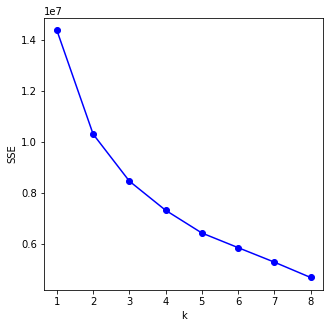

In [19]:
#ทำการนำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามีกี่ k กลุ่ม
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 4 กลุ่ม ดูจากจุดที่ k ที่ 4 เริ่มมีความแตกต่างของระยะห่างระหว่างจุดที่ใกล้กัน 

ใช้วิธีการหาค่า k ด้วยวิธี  _" The silhouette coefficient "_

In [20]:
#import function metrics มาใช้
from sklearn import metrics

In [21]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

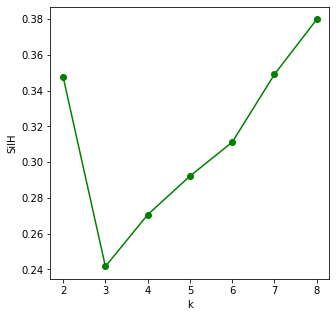

In [22]:
matplotlib.rcParams['figure.figsize']=[5,5]
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('SilH');

จากกราฟจะบอกได้ว่า k มีทั้งหมด 8 กลุ่ม ดูค่าได้จุดที่มีค่า SilH สูงที่สุด คือ 0.38

จากการดูกราฟ The elbow method และ The silhouette coefficient เพื่อหาค่า k ที่เหมาะสม พบว่าได้ค่า k ที่เหมาะสมคือ k = 4 และ 8 เราจึงเลือกใช้ k = 8 ในการจัดกลุ่มของ Data ชุดนี้ 

###ทำ PCA ลด Dimention

In [23]:
pca = PCA(n_components=2)

In [24]:
new_pca = pca.fit_transform(Data)

In [25]:
matplotlib.rcParams['figure.figsize']=[15,20] #ทำการเพิ่มขนาดของกราฟ เพื่อให้ดูการกระจายของข้อมูลได้ง่ายขึ้นและดูข้อมุลที่ซ้อนทับกันได้ง่ายขึ้น

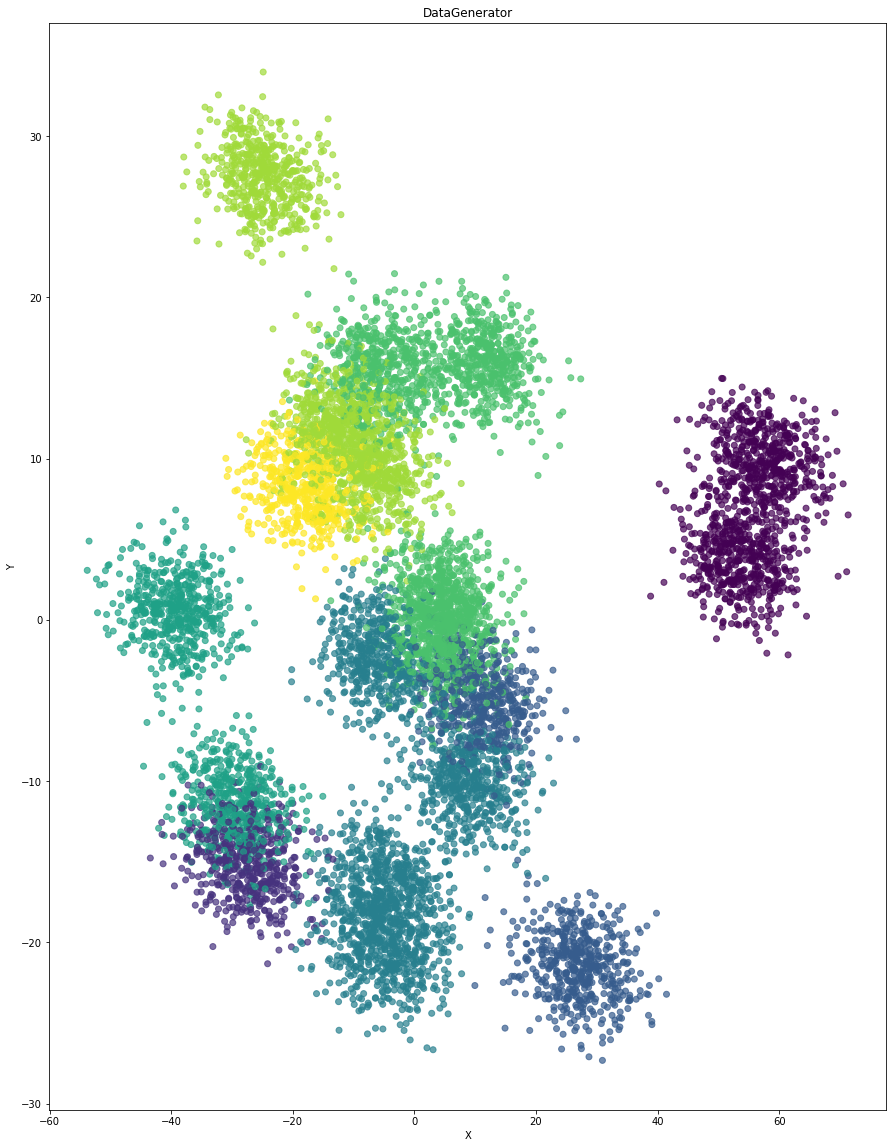

In [26]:
kmeans = KMeans(n_clusters= 8)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7) 
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากกราฟที่ได้ พบว่าเมื่อแบ่งกลุ่มของ Data เป็น 4 กลุ่ม จะได้กลุ่มของข้อมูลดังนี้

#3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

การลด Dimention ของข้อมูลจากทีเรียนมาสามารถทำได้ 3 วิธีคือ 
1. PCA : Principle Component Analysis
2. MDS : Multidimensional Scaling
3. Factor Analysis 

โดยที่เลือกการลด Dimension ด้วยวิธี MDS เพราะว่า ข้อที่ 2 ได้ใช้วิธี PCA ไปแล้ว และ การทำ Factor Analysis จะต้องมีการตรวจสอบข้อตกลงเบื้องต้นการทำ และเมื่อนำ Data นี้ไปตรวจสอบตามข้อตกลงแล้ว ไม่สามารถจะทำวิธี Factor Analysis ได้ จึงได้ใช้ MDS 

###ทำ MDS ลด Dimention

In [27]:
from sklearn.manifold import MDS 

In [28]:
mds = MDS(n_components=2) #กำหนดว่าเราจะใช้ components ของ mds เป็น 2 

In [29]:
new_mds = mds.fit_transform(Data) #ทำการคำนวณข้อมูล คำนวณระยะห่างระหว่างจุด 

###ทำ K-mean 

In [30]:
kmeans2 = KMeans(n_clusters=8) #กำหนดกลุ่ม k = 8 ตามการหาค่า k ที่เหมาะสมข้างต้น 
kmeans2.fit(Data) 
g = kmeans2.predict(Data) #กำหนดให้ข้อมูลที่ทำการจัดกลุ่มเป็น g 

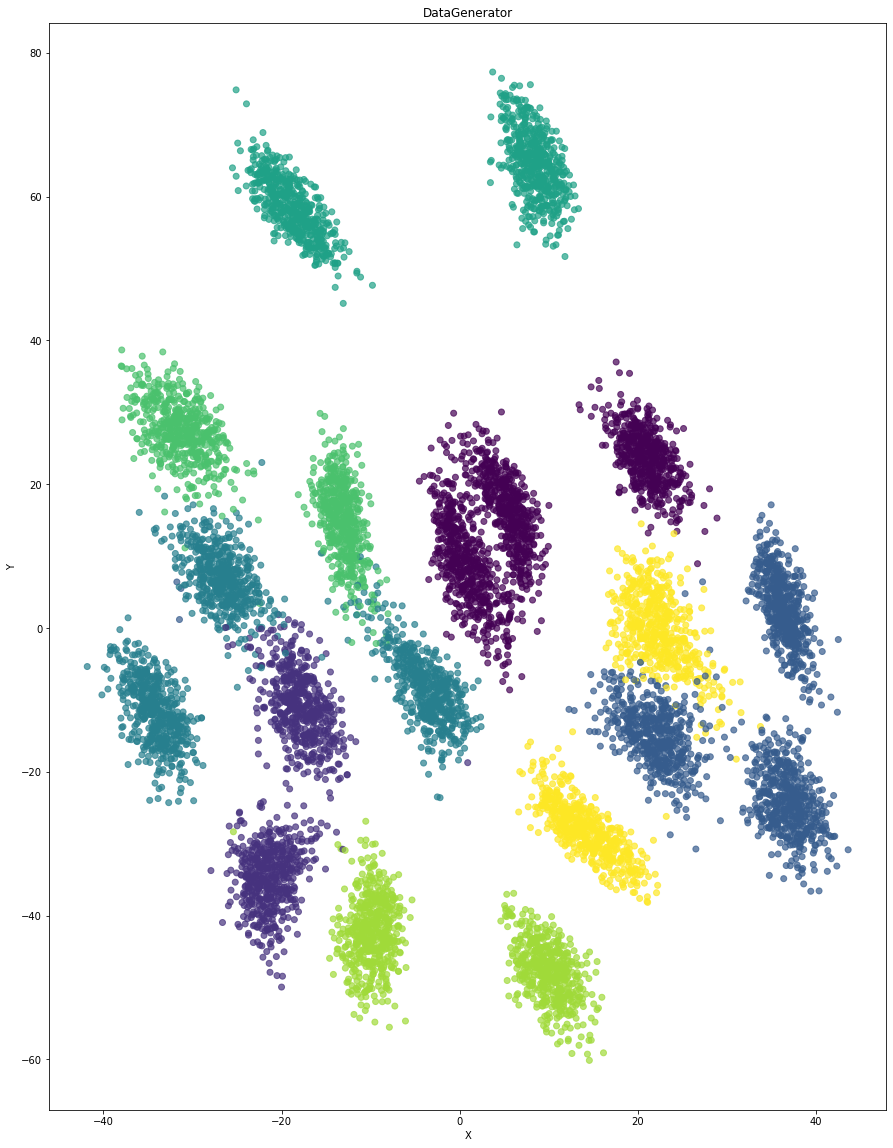

In [31]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

#4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

##กราฟจากข้อ 2 

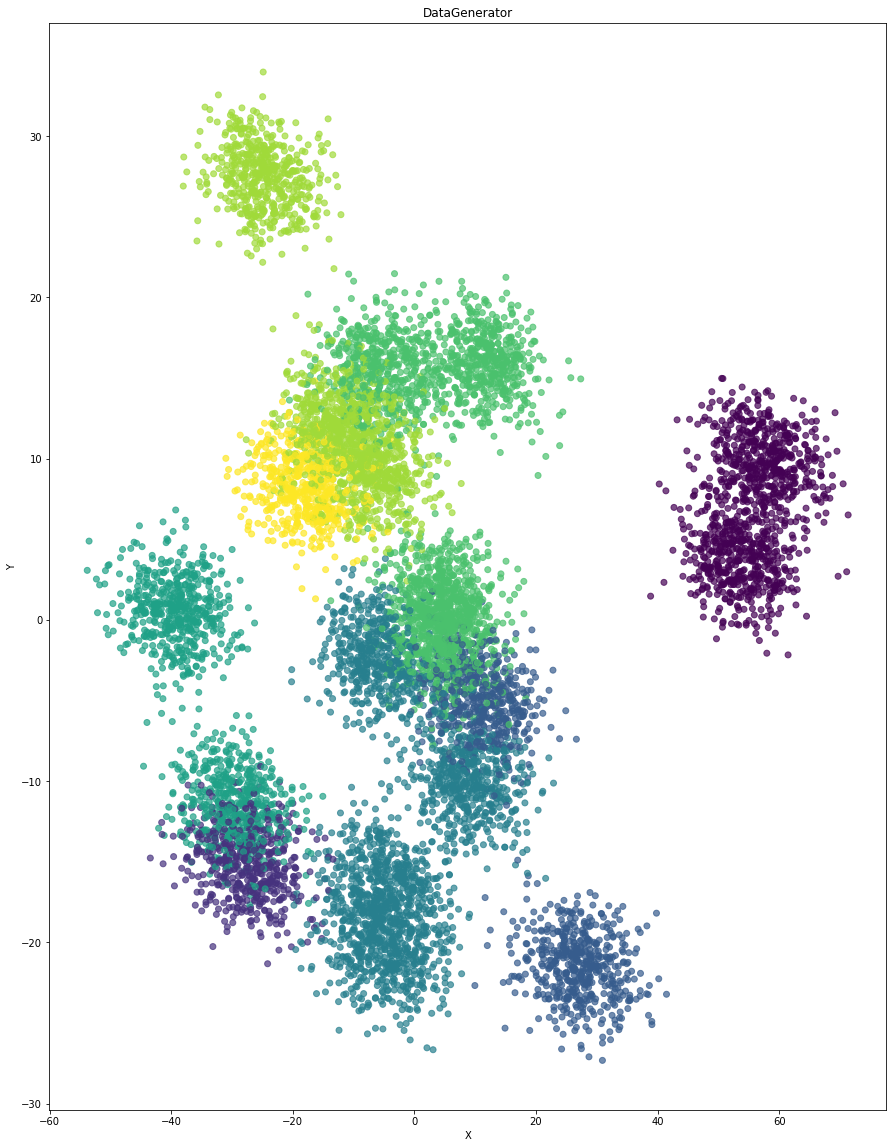

In [32]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

##กราฟจากข้อ 3 

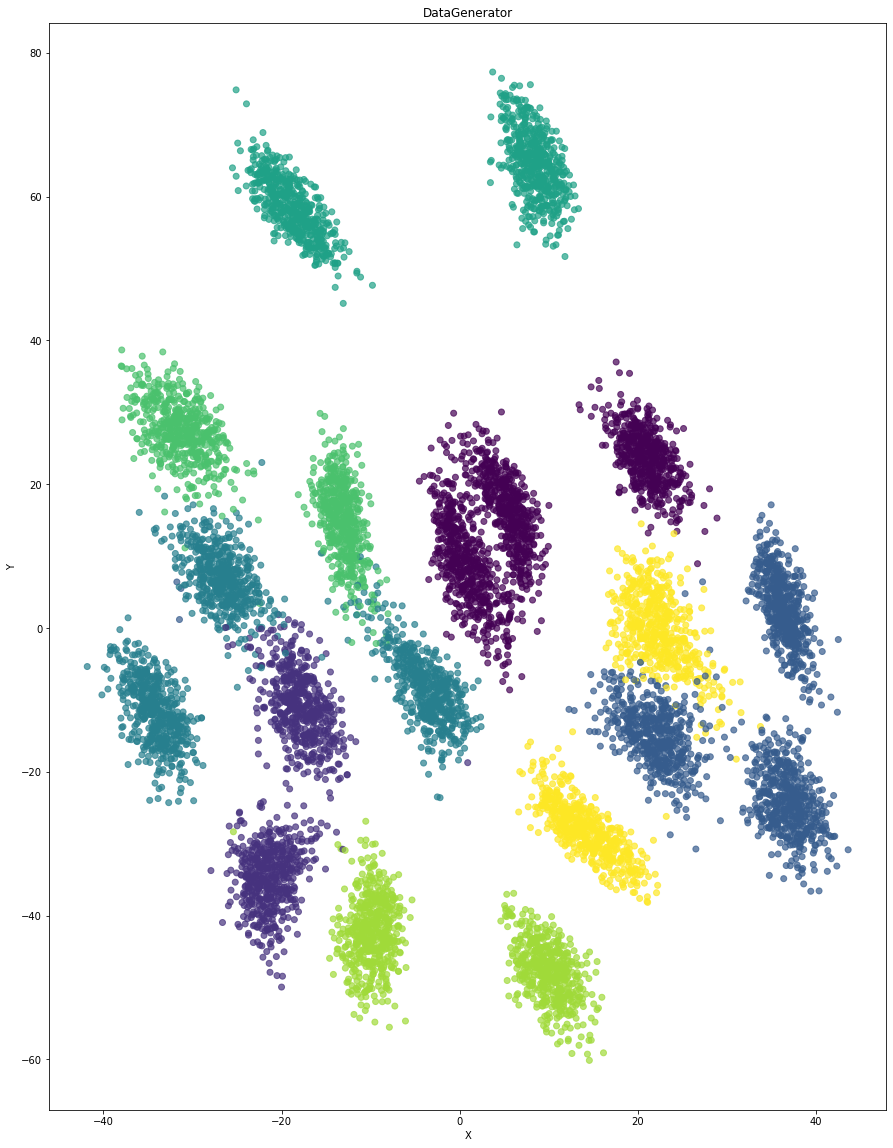

In [33]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');

จากการเปรียบเทียบกราฟทั้งข้อ 2 และข้อ 3 จะพบว่าการกระจายของข้อมูลนั้นต่างกัน 

และข้อที่ 2 มีการจัดกลุ่มโดยการ clustering ก่อนที่จะทำการลด Dimention ด้วยวิธี PCA ซึ่งเป็นการลดไดเมนชั่น โดยที่ทุกๆจุดของข้อมูลจะอยู่ที่เดิม 
  
และข้อ 3 มีการลดไดเมนชั่นของข้อมูลก่อน ค่อยนำข้อมูลที่ลดไดเมชั่นแล้วไปทำการ clustering ซึ่งทำการลด Dimention ด้วยวิธี MDS ซึ่งเป็นการลดไดเมนชั่น โดยที่ทุกๆจุดของข้อมูลจะยึดจุดตั้งต้นที่กำหนดเป็นหลัก 

